In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!wget https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/f0de314f-ea72-4385-9faa-f06593bb0a2d/file_downloaded -O phishing_mendeley.csv

--2025-07-15 09:55:32--  https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/f0de314f-ea72-4385-9faa-f06593bb0a2d/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/36a86805-c82f-4c8a-ae1b-f4288ddba85d [following]
--2025-07-15 09:55:33--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/36a86805-c82f-4c8a-ae1b-f4288ddba85d
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.108.192, 3.5.72.161, 52.218.40.40, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.108.192|:4

In [3]:
!wget https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/97e4b9fc-8c55-4579-ae80-d30740d00913/file_downloaded -O phishing_mendeley_2.csv

--2025-07-15 09:55:36--  https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/97e4b9fc-8c55-4579-ae80-d30740d00913/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/82bd98f3-d2d7-42fa-bf80-e1e04bcd054d [following]
--2025-07-15 09:55:37--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/82bd98f3-d2d7-42fa-bf80-e1e04bcd054d
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.65.251, 3.5.72.130, 52.92.0.74, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.65.251|:443... conn

In [4]:
main = pd.read_csv('/kaggle/working/phishing_mendeley.csv')
phishing = pd.read_csv('/kaggle/working/phishing_mendeley_2.csv')

In [5]:
main.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [6]:
phishing.head()

,url,Type
0,https://docs.google.com/presentation/d/e/2PACX...,Phishing
1,https://btttelecommunniccatiion.weeblysite.com/,Phishing
2,https://kq0hgp.webwave.dev/,Phishing
3,https://brittishtele1bt-69836.getresponsesite....,Phishing
4,https://bt-internet-105056.weeblysite.com/,Phishing


In [7]:
main.columns

Index(['url', 'type'], dtype='object')

In [8]:
phishing.columns

Index(['url', 'Type'], dtype='object')

In [9]:
phishing_renamed = phishing.rename(columns={'Type': 'type'})

In [10]:
data = pd.concat([main, phishing_renamed], ignore_index=True)

In [11]:
data.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504983 entries, 0 to 504982
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     504983 non-null  object
 1   type    504983 non-null  object
dtypes: object(2)
memory usage: 7.7+ MB


In [13]:
data['type'].value_counts()

type
legitimate    345738
phishing      104438
Phishing       54807
Name: count, dtype: int64

In [14]:
# Option 1: Convert all to lowercase
data['type'] = data['type'].str.lower()
print(data['type'].value_counts())

type
legitimate    345738
phishing      159245
Name: count, dtype: int64


In [15]:
print(data['type'].value_counts(normalize=True) * 100)

type
legitimate    68.465275
phishing      31.534725
Name: proportion, dtype: float64


In [16]:
data.isna().sum()

url     0
type    0
dtype: int64

In [17]:
data = data.dropna(subset=['url'])

In [18]:
data['url'].nunique()

504933

In [19]:
data = data.drop_duplicates(subset=['url'], keep='first')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504933 entries, 0 to 504981
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     504933 non-null  object
 1   type    504933 non-null  object
dtypes: object(2)
memory usage: 11.6+ MB


In [21]:
data.describe()

,url,type
count,504933,504933
unique,504933,2
top,https://www.google.com,legitimate
freq,1,345738


In [22]:
# 1. Look at URL length distribution
url_lengths = data['url'].str.len()
print(f"URL Length Stats:")
print(f"Min: {url_lengths.min()}")
print(f"Max: {url_lengths.max()}")
print(f"Average: {url_lengths.mean():.1f}")
print(f"Median: {url_lengths.median():.1f}")

# 2. Sample some URLs to understand the data better
print("\nSample legitimate URLs:")
print(data[data['type'] == 'legitimate']['url'].sample(5).tolist())
print("\nSample phishing URLs:")
print(data[data['type'] == 'phishing']['url'].sample(5).tolist())

URL Length Stats:
Min: 8
Max: 25523
Average: 60.9
Median: 52.0

Sample legitimate URLs:
['https://www.linkedin.com/pub/marc-de-grandpre/0/b3b/558', 'https://www.freebase.com/view/en/criollo/-/people/ethnicity/people', 'https://www.roysplacerestaurant.com/', 'https://www.judgepedia.org/index.php/Francis_Van_Dusen', 'https://www.epinions.com/review/Tango_by_Air_Canada/content_214733590148']

Sample phishing URLs:
['http://autosource.info/ebay/Get%20started%20with%20eBay.asp', 'https://ipfs.eth.aragon.network/ipfs/bafybeid6qdsbzkw7clejdqc7nbr53hkr7oi6uwddtqshfkzwans73phsvi/gyyt/', 'http://bbs.ydss.cn/forum.php?mod=attachment&amp;aid=MjM0MTgyfGJlODYwNTQ0fDEzNzQzMTE4MTZ8MTAxMTM0MXwyOTc3NDQ=', 'http://mockup.asia/x5ief', 'http://www.davelog.com/mirror/ti83plus.htm']


In [23]:
from urllib.parse import urlparse
import re

def extract_url_features(df):
    """Extract optimized features from URLs for phishing detection"""
    
    def calculate_entropy(s):
        if not s or len(s) == 0:
            return 0
        prob = [float(s.count(c)) / len(s) for c in dict.fromkeys(list(s))]
        return -sum([p * np.log2(p) for p in prob if p > 0])
    
    def safe_urlparse(url):
        try:
            return urlparse(url)
        except:
            return urlparse('')
    
    def has_valid_port(url):
        try:
            return bool(safe_urlparse(url).port)
        except ValueError:
            return False

    # Key length features (log-normalized for better distribution)
    df['url_length'] = df['url'].str.len()
    df['domain_length'] = df['url'].apply(lambda x: len(safe_urlparse(x).netloc))
    df['url_length_norm'] = np.log1p(df['url_length'])
    df['domain_length_norm'] = np.log1p(df['domain_length'])
    
    # Entropy features (strong predictors)
    df['url_entropy'] = df['url'].apply(calculate_entropy)
    df['domain_entropy'] = df['url'].apply(lambda x: calculate_entropy(safe_urlparse(x).netloc))
    
    # Key character analysis
    df['num_dots'] = df['url'].str.count('\.')
    df['num_hyphens'] = df['url'].str.count('-')
    df['num_digits'] = df['url'].str.count(r'\d')
    df['num_subdomains'] = df['url'].apply(lambda x: max(0, len(safe_urlparse(x).netloc.split('.')) - 2))
    
    # Ratios (better than raw counts)
    df['dot_ratio'] = df['num_dots'] / (df['url_length'] + 1)
    df['hyphen_ratio'] = df['num_hyphens'] / (df['url_length'] + 1)
    df['digit_ratio'] = df['num_digits'] / (df['url_length'] + 1)
    df['subdomain_ratio'] = df['num_subdomains'] / (df['domain_length'] + 1)
    
    # Protocol analysis
    df['protocol'] = df['url'].apply(lambda x: safe_urlparse(x).scheme.lower())
    df['is_https'] = (df['protocol'] == 'https').astype(int)
    df['has_unusual_protocol'] = (~df['protocol'].isin(['http', 'https', ''])).astype(int)
    
    # High-impact security indicators
    df['has_ip'] = df['url'].str.contains(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', na=False).astype(int)
    df['has_suspicious_port'] = df['url'].str.contains(r':(?!80|443|8080|8443)\d+', na=False).astype(int)
    df['has_at_symbol'] = df['url'].str.contains('@', na=False).astype(int)
    df['has_double_slash'] = df['url'].str.contains('//(?!http)', na=False).astype(int)
    df['has_url_encoding'] = df['url'].str.contains(r'%[0-9a-fA-F]{2}', na=False).astype(int)
    
    # Path analysis
    df['path_length'] = df['url'].apply(lambda x: len(safe_urlparse(x).path))
    df['path_depth'] = df['url'].apply(lambda x: safe_urlparse(x).path.count('/'))
    df['path_length_ratio'] = df['path_length'] / (df['url_length'] + 1)
    
    # Query parameters
    df['has_query'] = df['url'].apply(lambda x: bool(safe_urlparse(x).query)).astype(int)
    df['query_length'] = df['url'].apply(lambda x: len(safe_urlparse(x).query))
    df['query_length_ratio'] = df['query_length'] / (df['url_length'] + 1)
    
    # Domain structure
    df['domain_tokens'] = df['url'].apply(lambda x: len(safe_urlparse(x).netloc.split('.')))
    df['has_www'] = df['url'].str.contains(r'//www\.', na=False).astype(int)
    df['many_subdomains'] = (df['num_subdomains'] > 3).astype(int)
    
    # Suspicious keywords (as requested to keep)
    high_risk_keywords = ['login', 'signin', 'account', 'verification', 'verify', 'secure', 'security',
                          'update', 'urgent', 'suspended', 'limited', 'expired', 'confirm', 'activate']
    brand_keywords = ['banking', 'paypal', 'amazon', 'microsoft', 'google', 'apple', 'facebook']
    bait_keywords = ['free', 'prize', 'winner', 'click', 'here', 'now', 'download']
    
    df['has_high_risk_keywords'] = df['url'].str.contains(r'\b(?:' + '|'.join(high_risk_keywords) + r')\b',
                                                           case=False, na=False).astype(int)
    df['has_brand_keywords'] = df['url'].str.contains(r'\b(?:' + '|'.join(brand_keywords) + r')\b',
                                                       case=False, na=False).astype(int)
    df['has_bait_keywords'] = df['url'].str.contains(r'\b(?:' + '|'.join(bait_keywords) + r')\b',
                                                      case=False, na=False).astype(int)
    
    # TLD analysis
    suspicious_tlds = ['tk', 'ml', 'ga', 'cf', 'bit', 'pw', 'top', 'click', 'download', 'work']
    df['has_suspicious_tld'] = df['url'].str.contains(r'\.(?:' + '|'.join(suspicious_tlds) + r')(?:/|$)',
                                                      case=False, na=False).astype(int)
    
    # Length categorization
    df['is_very_long_url'] = (df['url_length'] > 150).astype(int)
    df['is_very_short_url'] = (df['url_length'] < 20).astype(int)
    
    # Randomness and structure indicators
    df['has_random_string'] = df['url'].str.contains(r'[a-zA-Z0-9]{12,}', na=False).astype(int)
    df['consonant_ratio'] = df['url'].str.count(r'[bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ]') / (df['url_length'] + 1)
    df['has_numeric_subdomain'] = df['url'].str.contains(r'://\d+\.', na=False).astype(int)
    
    # Simple counts without domain knowledge weights
    df['security_risk_count'] = (
        df['has_ip'] + df['has_suspicious_port'] + df['has_at_symbol'] + 
        df['has_double_slash'] + df['has_url_encoding'] + df['has_unusual_protocol']
    )
    
    df['content_risk_count'] = (
        df['has_high_risk_keywords'] + df['has_brand_keywords'] + df['has_bait_keywords']
    )
    
    df['structure_risk_count'] = (
        df['has_suspicious_tld'] + df['many_subdomains'] + df['is_very_long_url'] + 
        df['has_random_string'] + df['has_numeric_subdomain']
    )
    
    # Total risk count
    df['total_risk_count'] = df['security_risk_count'] + df['content_risk_count'] + df['structure_risk_count']
    
    # Remove redundant raw features to reduce multicollinearity
    features_to_drop = ['url_length', 'domain_length', 'path_length', 'query_length',
                       'num_dots', 'num_hyphens', 'num_digits', 'num_subdomains', 'protocol']
    df = df.drop(columns=features_to_drop, errors='ignore')
    
    return df

In [24]:
data_with_features = extract_url_features(data.copy())

In [25]:
data_with_features.head()

,url,type,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
0,https://www.google.com,legitimate,3.135494,2.708050,3.663533,2.842371,0.086957,0.0,0.0,0.066667,...,0,0,0,0,0.565217,0,1,1,0,2
1,https://www.youtube.com,legitimate,3.178054,2.772589,3.762267,3.189898,0.083333,0.0,0.0,0.062500,...,0,0,0,0,0.541667,0,1,0,0,1
2,https://www.facebook.com,legitimate,3.218876,2.833213,3.855389,3.155639,0.080000,0.0,0.0,0.058824,...,0,0,0,0,0.560000,0,1,1,0,2
3,https://www.baidu.com,legitimate,3.091042,2.639057,3.880180,3.180833,0.090909,0.0,0.0,0.071429,...,0,0,0,0,0.545455,0,1,0,0,1
4,https://www.wikipedia.org,legitimate,3.258097,2.890372,3.813661,3.219528,0.076923,0.0,0.0,0.055556,...,0,0,0,0,0.538462,0,1,0,0,1


In [26]:
data_with_features.describe()

,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,is_https,has_unusual_protocol,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
count,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,...,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000
mean,4.002852,2.985087,4.322615,3.403672,0.048161,0.015159,0.057963,0.053442,0.794622,0.000085,...,0.006842,0.025970,0.004904,0.429366,0.533645,0.009528,1.045155,0.084795,0.475425,1.605375
std,0.461974,0.334868,0.352309,0.374194,0.020071,0.024913,0.081601,0.030021,0.403978,0.009228,...,0.082436,0.159045,0.069854,0.494986,0.067511,0.097145,0.221926,0.291317,0.559253,0.731818
min,2.197225,0.000000,1.339504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.688879,2.772589,4.098069,3.182006,0.034091,0.000000,0.000000,0.040000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,3.970292,2.995732,4.296439,3.408053,0.046512,0.000000,0.021277,0.055556,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.540541,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.276666,3.178054,4.531693,3.652131,0.060000,0.022727,0.092308,0.066667,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.578947,0.000000,1.000000,0.000000,1.000000,2.000000
max,10.147374,5.484797,6.048781,5.070529,0.216216,0.341667,0.808974,0.250000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.872928,1.000000,4.000000,3.000000,3.000000,9.000000


In [27]:
data_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504933 entries, 0 to 504981
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     504933 non-null  object 
 1   type                    504933 non-null  object 
 2   url_length_norm         504933 non-null  float64
 3   domain_length_norm      504933 non-null  float64
 4   url_entropy             504933 non-null  float64
 5   domain_entropy          504933 non-null  float64
 6   dot_ratio               504933 non-null  float64
 7   hyphen_ratio            504933 non-null  float64
 8   digit_ratio             504933 non-null  float64
 9   subdomain_ratio         504933 non-null  float64
 10  is_https                504933 non-null  int64  
 11  has_unusual_protocol    504933 non-null  int64  
 12  has_ip                  504933 non-null  int64  
 13  has_suspicious_port     504933 non-null  int64  
 14  has_at_symbol           5

In [28]:
data_with_features.isna().sum()

url                       0
type                      0
url_length_norm           0
domain_length_norm        0
url_entropy               0
domain_entropy            0
dot_ratio                 0
hyphen_ratio              0
digit_ratio               0
subdomain_ratio           0
is_https                  0
has_unusual_protocol      0
has_ip                    0
has_suspicious_port       0
has_at_symbol             0
has_double_slash          0
has_url_encoding          0
path_depth                0
path_length_ratio         0
has_query                 0
query_length_ratio        0
domain_tokens             0
has_www                   0
many_subdomains           0
has_high_risk_keywords    0
has_brand_keywords        0
has_bait_keywords         0
has_suspicious_tld        0
is_very_long_url          0
is_very_short_url         0
has_random_string         0
consonant_ratio           0
has_numeric_subdomain     0
security_risk_count       0
content_risk_count        0
structure_risk_count

In [29]:
data_with_features.dropna()

,url,type,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
0,https://www.google.com,legitimate,3.135494,2.708050,3.663533,2.842371,0.086957,0.000000,0.000000,0.066667,...,0,0,0,0,0.565217,0,1,1,0,2
1,https://www.youtube.com,legitimate,3.178054,2.772589,3.762267,3.189898,0.083333,0.000000,0.000000,0.062500,...,0,0,0,0,0.541667,0,1,0,0,1
2,https://www.facebook.com,legitimate,3.218876,2.833213,3.855389,3.155639,0.080000,0.000000,0.000000,0.058824,...,0,0,0,0,0.560000,0,1,1,0,2
3,https://www.baidu.com,legitimate,3.091042,2.639057,3.880180,3.180833,0.090909,0.000000,0.000000,0.071429,...,0,0,0,0,0.545455,0,1,0,0,1
4,https://www.wikipedia.org,legitimate,3.258097,2.890372,3.813661,3.219528,0.076923,0.000000,0.000000,0.055556,...,0,0,0,0,0.538462,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504964,http://www.balajigloves.net/js/attiinnddeexxxb...,phishing,3.970292,3.044522,4.245656,3.684184,0.056604,0.000000,0.000000,0.047619,...,0,0,0,1,0.603774,0,1,0,1,2
504967,http://lookatmynewphotos.com/,phishing,3.401197,3.091042,3.810928,3.649001,0.033333,0.000000,0.000000,0.000000,...,0,0,0,1,0.566667,0,1,0,1,2
504971,https://www.markdbeats.com/wp-content/plugins/...,phishing,3.970292,2.944439,4.324944,3.572431,0.037736,0.018868,0.018868,0.052632,...,0,0,0,0,0.584906,0,1,0,0,1
504977,http://webmailadmin0.myfreesites.net/,phishing,3.637586,3.401197,4.077715,3.784898,0.052632,0.000000,0.026316,0.033333,...,0,0,0,1,0.526316,0,1,0,1,2


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


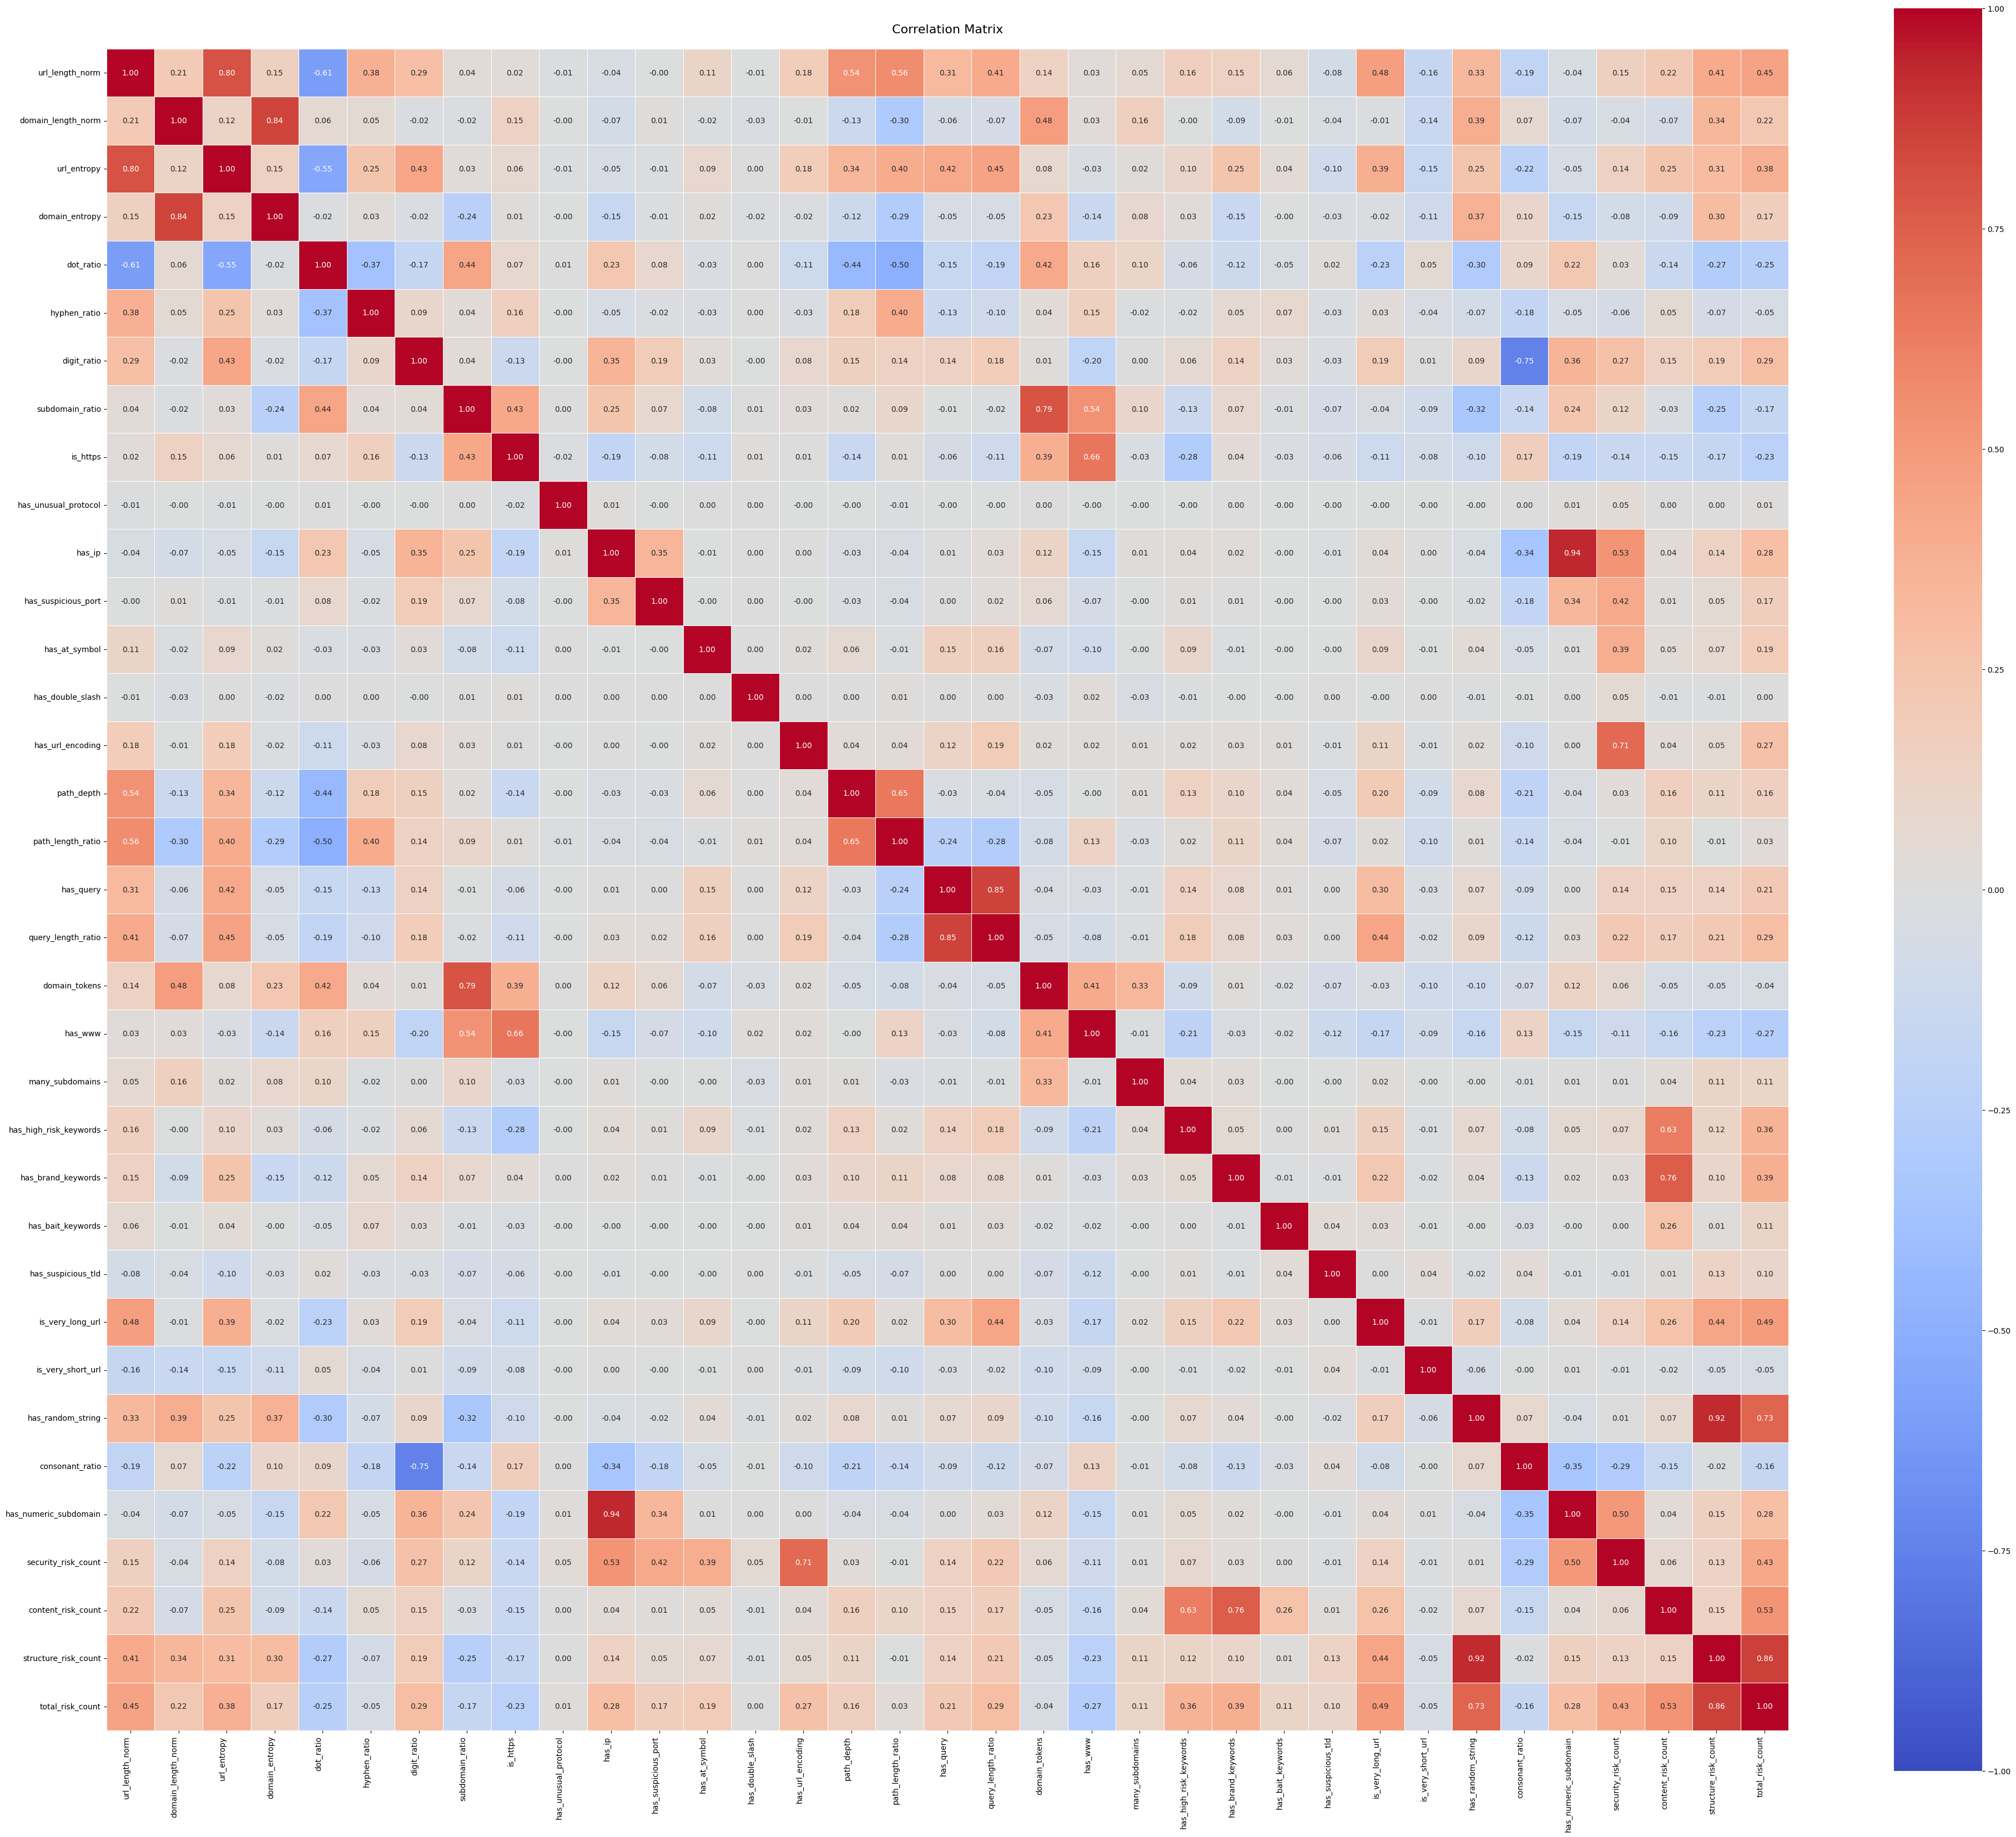

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = data_with_features.drop(columns=['url', 'type'])
corr = numeric_df.corr()

plt.figure(figsize=(40,40))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
data_with_features.head()

,url,type,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
0,https://www.google.com,legitimate,3.135494,2.708050,3.663533,2.842371,0.086957,0.0,0.0,0.066667,...,0,0,0,0,0.565217,0,1,1,0,2
1,https://www.youtube.com,legitimate,3.178054,2.772589,3.762267,3.189898,0.083333,0.0,0.0,0.062500,...,0,0,0,0,0.541667,0,1,0,0,1
2,https://www.facebook.com,legitimate,3.218876,2.833213,3.855389,3.155639,0.080000,0.0,0.0,0.058824,...,0,0,0,0,0.560000,0,1,1,0,2
3,https://www.baidu.com,legitimate,3.091042,2.639057,3.880180,3.180833,0.090909,0.0,0.0,0.071429,...,0,0,0,0,0.545455,0,1,0,0,1
4,https://www.wikipedia.org,legitimate,3.258097,2.890372,3.813661,3.219528,0.076923,0.0,0.0,0.055556,...,0,0,0,0,0.538462,0,1,0,0,1


In [32]:
data_with_features.columns

Index(['url', 'type', 'url_length_norm', 'domain_length_norm', 'url_entropy',
       'domain_entropy', 'dot_ratio', 'hyphen_ratio', 'digit_ratio',
       'subdomain_ratio', 'is_https', 'has_unusual_protocol', 'has_ip',
       'has_suspicious_port', 'has_at_symbol', 'has_double_slash',
       'has_url_encoding', 'path_depth', 'path_length_ratio', 'has_query',
       'query_length_ratio', 'domain_tokens', 'has_www', 'many_subdomains',
       'has_high_risk_keywords', 'has_brand_keywords', 'has_bait_keywords',
       'has_suspicious_tld', 'is_very_long_url', 'is_very_short_url',
       'has_random_string', 'consonant_ratio', 'has_numeric_subdomain',
       'security_risk_count', 'content_risk_count', 'structure_risk_count',
       'total_risk_count'],
      dtype='object')

In [33]:
features = [
    'url_entropy',              # Top predictor - randomness in URLs
    'domain_entropy',           # Domain randomness patterns
    'has_ip',                   # Direct IP instead of domain - major red flag
    'has_suspicious_tld',       # Free/suspicious TLDs (.tk, .ml, .ga)
    'has_high_risk_keywords',   # "login", "verify", "urgent", etc.
    'total_risk_count',         # Aggregate risk score
    'url_length_norm',          # Unusually long URLs
    'subdomain_ratio',          # Excessive subdomains
    'has_at_symbol',            # @ symbol for redirection
    'has_brand_keywords',       # Brand impersonation attempts
    'path_depth',               # Deep directory structures
    'has_url_encoding'          # URL encoding obfuscation
]

In [34]:
print(data_with_features.columns.tolist())

['url', 'type', 'url_length_norm', 'domain_length_norm', 'url_entropy', 'domain_entropy', 'dot_ratio', 'hyphen_ratio', 'digit_ratio', 'subdomain_ratio', 'is_https', 'has_unusual_protocol', 'has_ip', 'has_suspicious_port', 'has_at_symbol', 'has_double_slash', 'has_url_encoding', 'path_depth', 'path_length_ratio', 'has_query', 'query_length_ratio', 'domain_tokens', 'has_www', 'many_subdomains', 'has_high_risk_keywords', 'has_brand_keywords', 'has_bait_keywords', 'has_suspicious_tld', 'is_very_long_url', 'is_very_short_url', 'has_random_string', 'consonant_ratio', 'has_numeric_subdomain', 'security_risk_count', 'content_risk_count', 'structure_risk_count', 'total_risk_count']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_with_features[features],
    data_with_features['type'].map({'phishing': 1, 'legitimate': 0}),
    test_size=0.2,
    random_state=42,
    stratify=data_with_features['type']
)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=30,          
    max_depth=8,              
    min_samples_split=100,  
    min_samples_leaf=50,      
    max_features=4,           
    bootstrap=True,           
    oob_score=True,           
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [37]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=4,
                       min_samples_leaf=50, min_samples_split=100,
                       n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=42)

In [38]:
y_pred_rf = rf_model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9017
F1-Score: 0.8293

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     69148
           1       0.92      0.76      0.83     31839

    accuracy                           0.90    100987
   macro avg       0.91      0.86      0.88    100987
weighted avg       0.90      0.90      0.90    100987



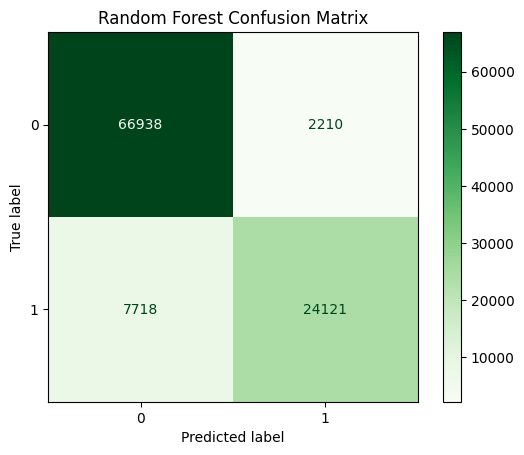

In [40]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

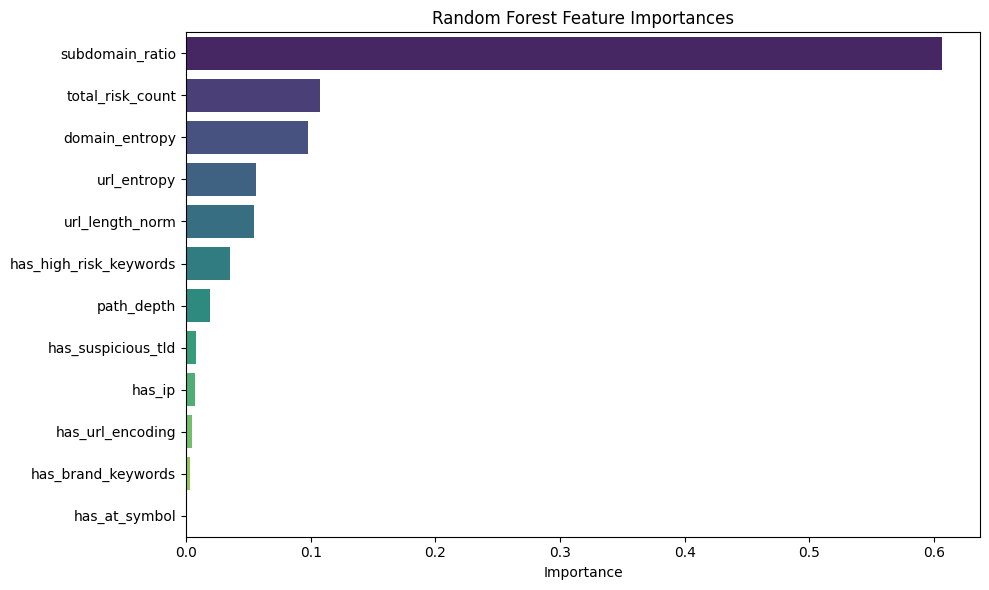

In [41]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette='viridis')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# Compact cross-validation (3-fold instead of 5)
cv_results = cross_validate(
    rf_model,
    data_with_features[features],
    data_with_features['type'].map({'phishing': 1, 'legitimate': 0}),
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring=['accuracy', 'f1', 'precision', 'recall'],
    n_jobs=-1
)

# Compact results display
for metric in ['accuracy', 'f1', 'precision', 'recall']:
    score = cv_results[f'test_{metric}'].mean()
    print(f"{metric.capitalize()}: {score:.4f}")

Accuracy: 0.9010
F1: 0.8288
Precision: 0.9112
Recall: 0.7601


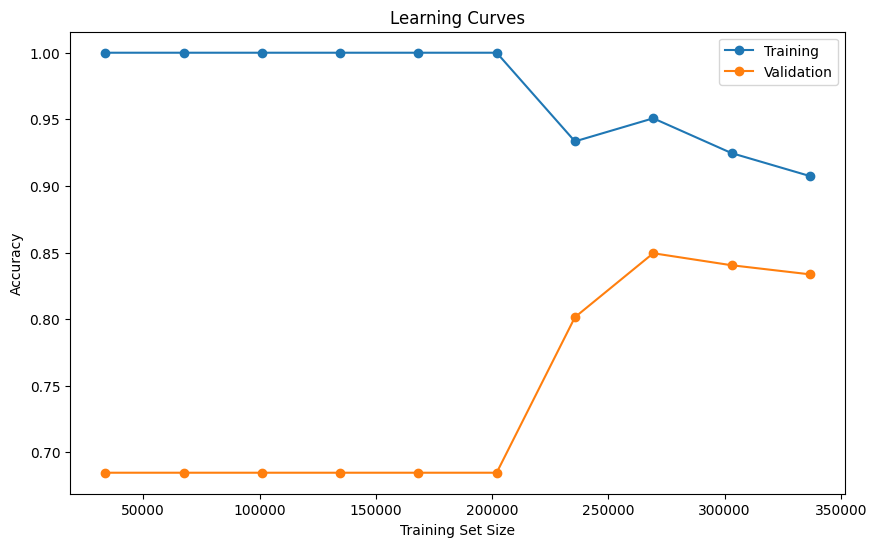

In [43]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    rf_model, 
    data_with_features[features],
    data_with_features['type'].map({'phishing': 1, 'legitimate': 0}),
    cv=3,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=100,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)


In [47]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

In [48]:
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.8843
F1-Score: 0.8127

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     69148
           1       0.83      0.80      0.81     31839

    accuracy                           0.88    100987
   macro avg       0.87      0.86      0.86    100987
weighted avg       0.88      0.88      0.88    100987



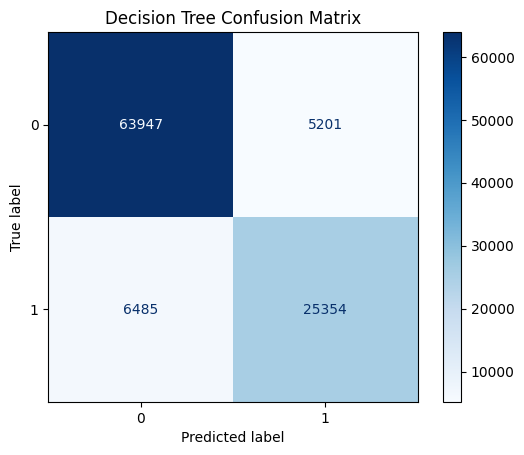

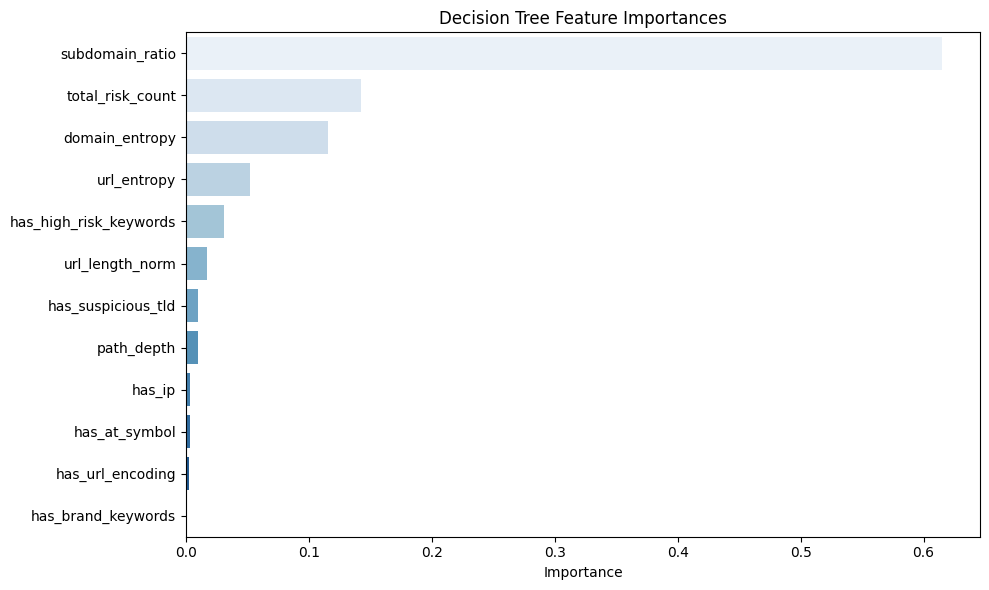

In [49]:
# Visualize Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Feature Importance for Decision Tree
dt_importances = dt_model.feature_importances_
sorted_idx = np.argsort(dt_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=dt_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette='Blues')
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [59]:
from collections import Counter

counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos 

In [60]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    scale_pos_weight= scale_pos_weight ,  
    random_state=42
)


In [61]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [62]:
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.9180
F1-Score: 0.8653

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     69148
           1       0.90      0.84      0.87     31839

    accuracy                           0.92    100987
   macro avg       0.91      0.90      0.90    100987
weighted avg       0.92      0.92      0.92    100987



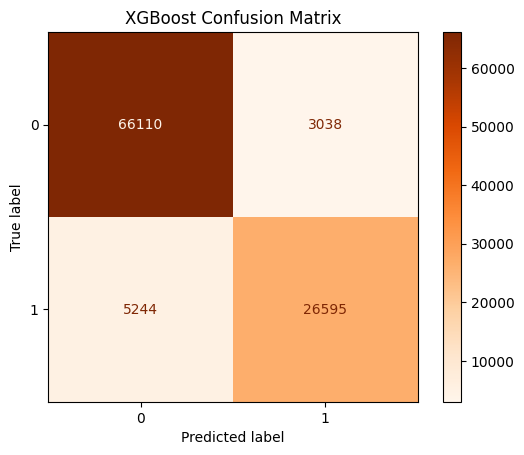

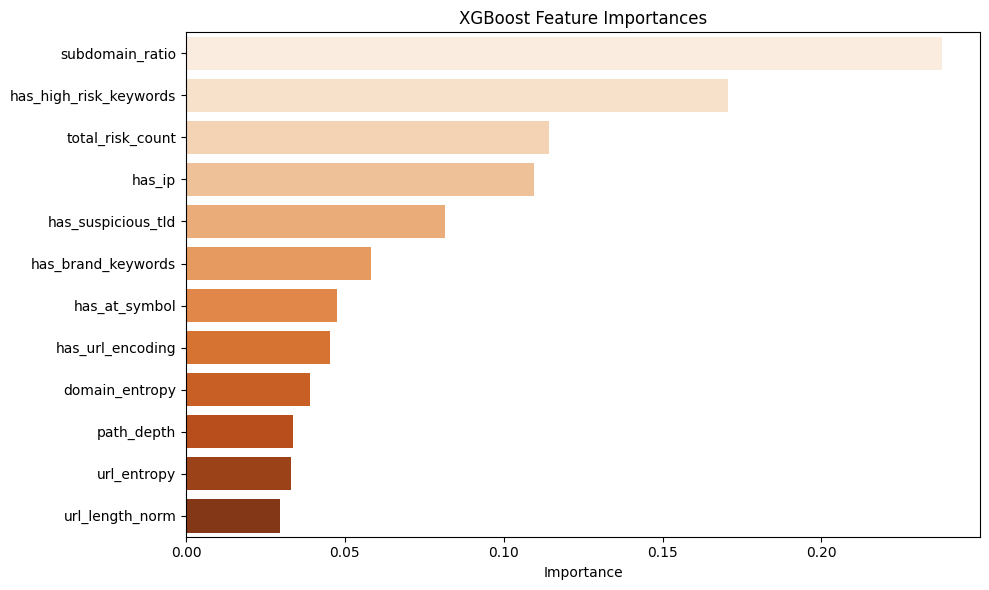

In [63]:
# Visualize XGBoost Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature Importance for XGBoost
xgb_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette='Oranges')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from collections import Counter

# Compute class imbalance
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos

# Parameter grid
xgb_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_random = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)
print("XGBoost Best Parameters:", xgb_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost Best Parameters: {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_clf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}


In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'class_weight': ['balanced', None]
}

dt_clf = DecisionTreeClassifier(random_state=42)

dt_random = RandomizedSearchCV(
    estimator=dt_clf,
    param_distributions=dt_param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

dt_random.fit(X_train, y_train)
print("Decision Tree Best Parameters:", dt_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Decision Tree Best Parameters: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'class_weight': None}


In [67]:
from sklearn.model_selection import cross_validate
import pandas as pd

# 1. Check for overfitting across best-tuned models
def check_overfitting(models, X_train, y_train):
    results = []
    for name, model in models.items():
        cv_results = cross_validate(
            model, X_train, y_train, cv=3,
            scoring=['accuracy', 'f1'], return_train_score=True,
            n_jobs=-1
        )
        
        results.append({
            'Model': name,
            'Train Acc': cv_results['train_accuracy'].mean(),
            'Test Acc': cv_results['test_accuracy'].mean(),
            'Acc Gap': cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean(),
            'F1 Gap': cv_results['train_f1'].mean() - cv_results['test_f1'].mean()
        })
    
    return pd.DataFrame(results)

In [68]:
# Use best models from RandomizedSearchCV objects
models = {
    'Decision Tree': dt_random.best_estimator_,
    'Random Forest': rf_random.best_estimator_,
    'XGBoost': xgb_random.best_estimator_
}


In [69]:
overfitting_df = check_overfitting(models, X_train, y_train)

print("🔍 Overfitting Analysis:")
print(overfitting_df.round(4))

# Highlight models with potential overfitting
for idx, row in overfitting_df.iterrows():
    if row['Acc Gap'] > 0.05 or row['F1 Gap'] > 0.05:
        print(f"⚠️ Warning: {row['Model']} shows signs of overfitting")


🔍 Overfitting Analysis:
           Model  Train Acc  Test Acc  Acc Gap  F1 Gap
0  Decision Tree     0.9455    0.9170   0.0285  0.0473
1  Random Forest     0.9881    0.9321   0.0560  0.0917
2        XGBoost     0.9374    0.9279   0.0095  0.0154
⚠️ Warning: Random Forest shows signs of overfitting


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to check feature dominance (potential leakage)
def check_leakage(models, features):
    for name, model in models.items():
        if hasattr(model, 'feature_importances_'):
            # Extract feature importances
            importances = model.feature_importances_
            feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
            feat_imp = feat_imp.sort_values('Importance', ascending=False)
            
            # Check for any feature dominating (e.g., >50%)
            if feat_imp.iloc[0]['Importance'] > 0.5:
                print(f"⚠️ Potential leakage in {name}: "
                      f"{feat_imp.iloc[0]['Feature']} has {feat_imp.iloc[0]['Importance']:.4f} importance")

            # Plot top 5 features
            plt.figure(figsize=(8, 4))
            plt.barh(feat_imp['Feature'].head(5), feat_imp['Importance'].head(5), color='teal')
            plt.gca().invert_yaxis()
            plt.title(f'{name} - Top 5 Feature Importances')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()


In [71]:
# Correlation check (optional: threshold = 0.8)
corr_matrix = X_train.corr()
high_corr = [
    (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
    for i in range(len(corr_matrix.columns))
    for j in range(i + 1, len(corr_matrix.columns))
    if abs(corr_matrix.iloc[i, j]) > 0.8
]

# Print correlated feature pairs
if high_corr:
    print("\n🔍 High-correlation feature pairs (possible redundancy or leakage):")
    for feat1, feat2, corr in high_corr:
        print(f"  • {feat1} & {feat2}: correlation = {corr:.4f}")
else:
    print("\n✅ No highly correlated feature pairs found (|r| > 0.8)")



✅ No highly correlated feature pairs found (|r| > 0.8)


⚠️ Potential leakage in Decision Tree: subdomain_ratio has 0.5658 importance


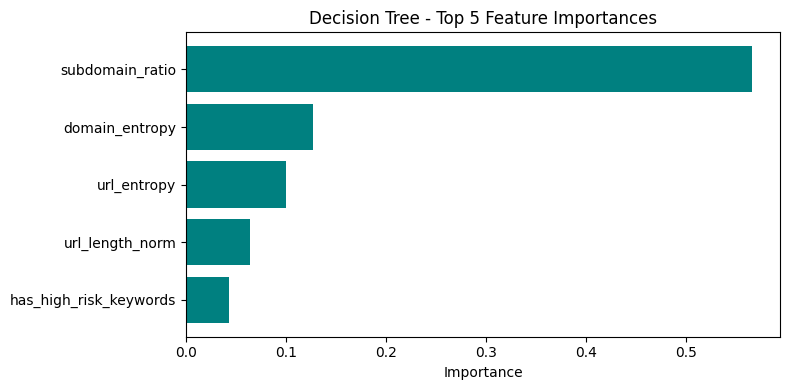

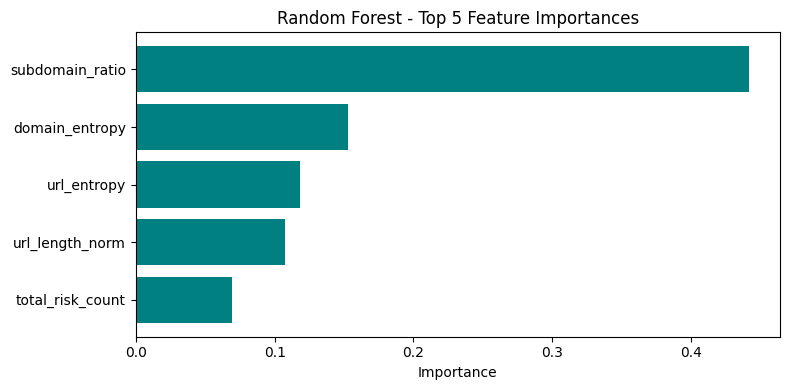

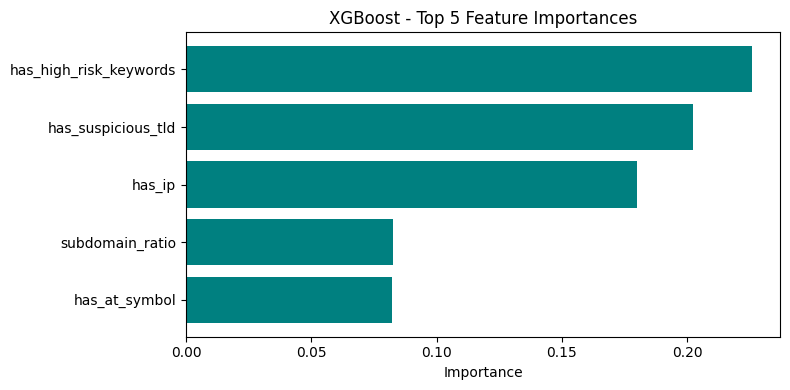

In [72]:
# Models after tuning
models = {
    'Decision Tree': dt_random.best_estimator_,
    'Random Forest': rf_random.best_estimator_,
    'XGBoost': xgb_random.best_estimator_
}

# Run leakage check
check_leakage(models, features)


In [73]:
import time
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

def evaluate_models(models, X_train, y_train, X_test, y_test, overfitting_df):
    results = []
    
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Calculate metrics safely (handle models without predict_proba)
        auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else None
        
        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'AUC': auc_score,
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Overfit': overfitting_df.loc[overfitting_df['Model'] == name, 'Acc Gap'].values[0],
            'Time': train_time
        })
    
    return pd.DataFrame(results)

# Run evaluation
eval_df = evaluate_models(models, X_train, y_train, X_test, y_test, overfitting_df)
print("\nModel Comparison:")
print(eval_df.round(4))

# Define a balanced score: F1 penalized by overfitting (adjust penalty weight if needed)
eval_df['Balanced'] = eval_df['F1'] - 0.5 * eval_df['Overfit']
best_model_name = eval_df.loc[eval_df['Balanced'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nRecommended model: {best_model_name}")
print(f"F1 Score: {eval_df.loc[eval_df['Model'] == best_model_name, 'F1'].values[0]:.4f}")
print(f"Overfitting Gap (Accuracy): {eval_df.loc[eval_df['Model'] == best_model_name, 'Overfit'].values[0]:.4f}")

# Save the best model to disk
model_filename = f'phishing_model_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as: {model_filename}")



Model Comparison:
           Model  Accuracy      F1     AUC  Precision  Recall  Overfit  \
0  Decision Tree    0.9207  0.8693  0.9486     0.9048  0.8366   0.0285   
1  Random Forest    0.9357  0.8962  0.9767     0.9130  0.8799   0.0560   
2        XGBoost    0.9301  0.8885  0.9739     0.8930  0.8840   0.0095   

       Time  
0    1.0963  
1  312.8794  
2    4.1395  

Recommended model: XGBoost
F1 Score: 0.8885
Overfitting Gap (Accuracy): 0.0095
Model saved as: phishing_model_xgboost.pkl
